In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [5]:
training_set=pd.read_csv('Train_Titanic.csv')
testing_set=pd.read_csv('Test_Titanic.csv')

In [4]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
testing_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


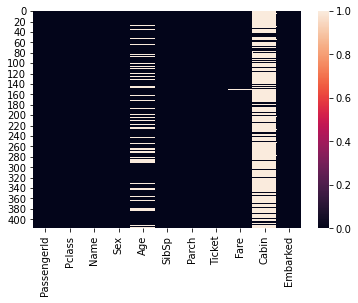

In [7]:
sns.heatmap(testing_set.isnull())

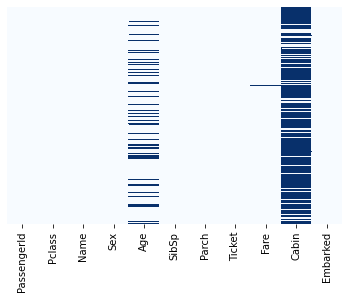

In [8]:
sns.heatmap(testing_set.isnull(), yticklabels=False, cbar=False, cmap='Blues') 

In [9]:
testing_set.drop('Cabin', axis=1, inplace=True)

In [10]:
testing_set.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
testing_set.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

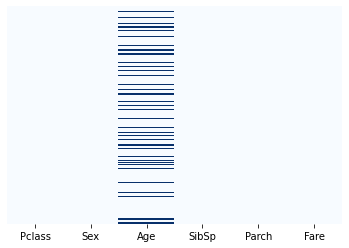

In [12]:
sns.heatmap(testing_set.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [13]:
testing_set[testing_set['Sex']=='male']['Age'].mean()

30.27273170731707

In [14]:
testing_set[testing_set['Sex']=='female']['Age'].mean()

30.27236220472441

In [15]:
def fill_Age(data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        return 30
    else:
        return age

In [16]:
testing_set['Age']=testing_set[['Age', 'Sex']].apply(fill_Age, axis=1)

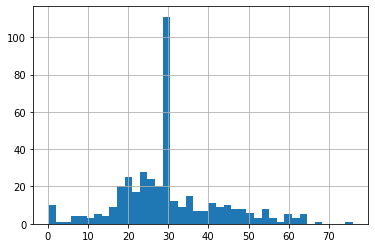

In [17]:
testing_set['Age'].hist(bins=40)

In [22]:
male=pd.get_dummies(testing_set['Age'], drop_first=True)
male.head()

,0.33,0.75,0.83,0.92,1.00,2.00,3.00,5.00,6.00,7.00,8.00,9.00,10.00,11.50,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,18.50,19.00,20.00,21.00,22.00,22.50,23.00,24.00,25.00,26.00,26.50,27.00,28.00,28.50,29.00,30.00,31.00,32.00,32.50,33.00,34.00,34.50,35.00,36.00,36.50,37.00,38.00,38.50,39.00,40.00,40.50,41.00,42.00,43.00,44.00,45.00,46.00,47.00,48.00,49.00,50.00,51.00,53.00,54.00,55.00,57.00,58.00,59.00,60.00,60.50,61.00,62.00,63.00,64.00,67.00,76.00
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
testing_set.drop(['Sex'], axis=1, inplace=True)

In [23]:
testing_set=pd.concat([testing_set, male], axis=1)